Sobreviventes

<ipython-input-1-c3fe7f162491>:119: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_viremia = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/Viral_load.csv",',')


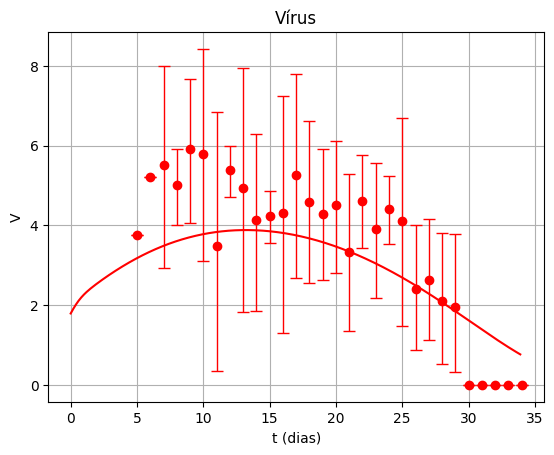

<ipython-input-1-c3fe7f162491>:141: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_il6 = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/dataset_il6_survivor.csv",',')


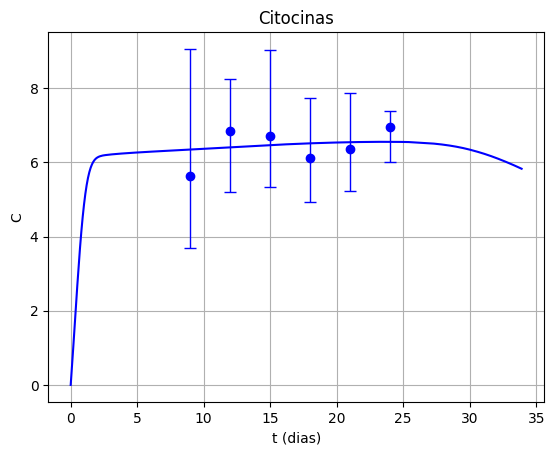

<ipython-input-1-c3fe7f162491>:163: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_IgG = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgG_data.csv",',')


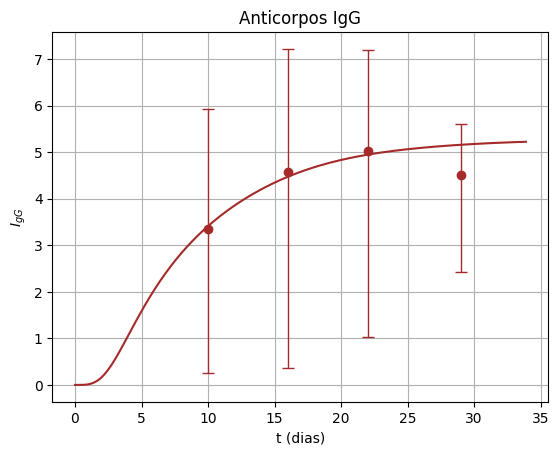

<ipython-input-1-c3fe7f162491>:184: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_IgM = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgM_data.csv",',')


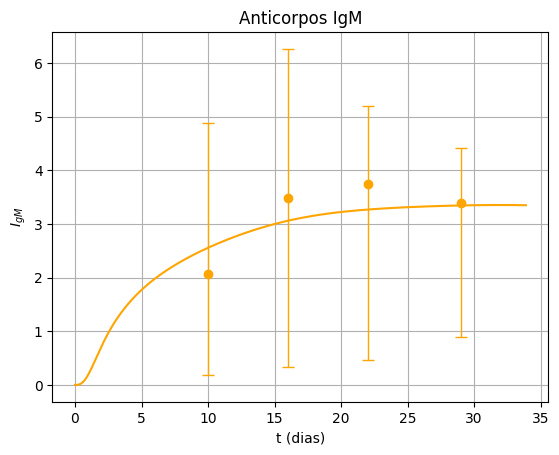

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def modelo(t, y, pi_v, k_v1, k_v2, k_v3, alfa_ap, beta_ap, c_ap1, c_ap2, delta_apm, beta_apm, beta_tke, alfa_th, beta_th, pi_th, delta_th, alfa_tk, beta_tk, pi_tk, delta_tk, alfa_b, pi_b1, pi_b2, beta_ps, beta_pl, beta_bm, delta_ps, delta_pl, gamma_bm, pi_bm1, pi_bm2, pi_ps, pi_pl, delta_am, delta_ag, pi_c_apm, pi_c_i, pi_c_tke, delta_c, Ap0, Thn0, Tkn0, B0):
  V, Ap, Apm, I, Thn, The, Tkn, Tke, B, Ps, Pl, Bm, IgM, IgG, C = y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14]

  dVdt = pi_v * V - k_v1 * V * IgG - k_v1 * V * IgM - k_v2 * V * Tke - k_v3 * V * Apm # vírus

  dApdt = alfa_ap * (C + 1) * (Ap0 - Ap) - beta_ap * Ap * ((c_ap1 * V) / (c_ap2 + V))  # APCs imaturas

  dApmdt = beta_ap * Ap * ((c_ap1 * V) / (c_ap2 + V)) - beta_apm * Apm * V - delta_apm * Apm  # APCs maduras

  dIdt = beta_apm * Apm * V + beta_tke * Tke * V - delta_apm * I  # células infectadas

  dThndt = alfa_th * (Thn0 - Thn) - beta_th * Apm * Thn  # células T CD4+ imaturas

  dThedt = beta_th * Apm * Thn + pi_th * Apm * The - delta_th * The # células T CD4+ maduras

  dTkndt = alfa_tk * (C + 1) * (Tkn0 - Tkn) - beta_tk * (C + 1) * Apm * Tkn # células T CD8+ imaturas

  dTkedt = beta_tk * (C + 1) * Apm * Tkn + pi_tk * Apm * Tke - beta_tke * Tke * V - delta_tk * Tke # células T CD8+ maduras

  dBdt = alfa_b * (B0 - B) + pi_b1 * V * B + pi_b2 * The * B - beta_ps * Apm * B - beta_pl * The * B - beta_bm * The * B # células B

  dPsdt = beta_ps * Apm * B - delta_ps * Ps # plasmócitos de vida curta

  dPldt = beta_pl * The * B - delta_pl * Pl + gamma_bm * Bm # plasmócitos de vida longa

  dBmdt = beta_bm * The * B + pi_bm1 * Bm * (1 - (Bm / pi_bm2)) - gamma_bm * Bm # células B de memória

  dIgMdt = pi_ps * Ps - delta_am * IgM # anticorpos IgM

  dIgGdt = pi_pl * Pl - delta_ag * IgG # anticorpos IgG

  dCdt = pi_c_apm * Apm + pi_c_i * I + pi_c_tke * Tke - delta_c * C # citocinas
  
  return [ dVdt, dApdt, dApmdt, dIdt, dThndt, dThedt, dTkndt, dTkedt, dBdt, dPsdt, dPldt, dBmdt, dIgMdt, dIgGdt, dCdt ]


# intervalo de tempo
t0 = 0.0
tf = 34.0
t = np.arange(t0, tf, 0.1)
t_span = (t0, tf)

# condições iniciais
V0 = 61.0 
Ap0 = 10**(6)
Apm0 = 0.0
I0 = 0.0
Thn0 = 10**(6)
The0 = 0.0
Tkn0 = 5.0 * 10**(5)
Tke0 = 0.0
B0 = 2.5 * 10**(5)
Ps0 = 0.0
Pl0 = 0.0
Bm0 = 0.0
IgM0 = 0.0
IgG0 = 0.0
C0 = 0.0

# valores dos parâmetros
pi_v = 1.47 * 10**(0)
k_v1 = 9.82 * 10**(-3)
k_v2 = 6.10 * 10**(-5)
k_v3 = 6.45 * 10**(-2)
alfa_ap = 1.0 * 10**(0)
beta_ap = 1.79 * 10**(-1)
c_ap1 = 8.0 * 10**(0)
c_ap2 = 8.08 * 10**(6)
delta_apm = 4.0 * 10**(-2)
beta_apm = 1.33 * 10**(-2)
beta_tke = 3.5 * 10**(-6)
alfa_th = 2.17 * 10**(-4)
beta_th = 1.8 * 10**(-5)
pi_th = 1.0 * 10**(-8)
delta_th = 3.0 * 10**(-1)
alfa_tk = 1.0 * 10**(0)
beta_tk = 1.43 * 10**(-5)
pi_tk = 1.0 * 10**(-8)
delta_tk = 3.0e-2
alfa_b = 3.578236584
pi_b1 = 8.98 * 10**(-5)
pi_b2 = 1.27 * 10**(-8)
beta_ps = 6.0 * 10**(-6)
beta_pl = 5.0 * 10**(-6)
beta_bm = 1.0 * 10**(-6)
delta_ps = 2.5 * 10**(0)
delta_pl = 3.5 * 10**(-1)
gamma_bm = 9.75 * 10**(-4)
pi_bm1 = 1.0 * 10**(-5)
pi_bm2 = 2.5 * 10**(3)
pi_ps = 8.7 * 10**(-2)
pi_pl = 1.0 * 10**(-3) 
delta_am = 7.0 * 10**(-2) 
delta_ag = 7.0 * 10**(-2)
pi_c_apm = 3.28 * 10**(2)
pi_c_i = 6.44 * 10**(-3)
pi_c_tke = 1.78 * 10**(-2)
delta_c = 7.04 * 10**(2)

y0 =  [V0, Ap0, Apm0, I0, Thn0, The0, Tkn0, Tke0, B0, Ps0, Pl0, Bm0, IgM0, IgG0, C0]
mmargs = (pi_v, k_v1, k_v2, k_v3, alfa_ap, beta_ap, c_ap1, c_ap2, delta_apm, beta_apm, beta_tke, alfa_th, beta_th, pi_th, delta_th, alfa_tk, beta_tk, pi_tk, delta_tk, alfa_b, pi_b1, pi_b2, beta_ps, beta_pl, beta_bm, delta_ps, delta_pl, gamma_bm, pi_bm1, pi_bm2, pi_ps, pi_pl, delta_am, delta_ag, pi_c_apm, pi_c_i, pi_c_tke, delta_c, Ap0, Thn0, Tkn0, B0)

sol = solve_ivp(modelo, t_span, y0, args=(mmargs), method='Radau', t_eval=t)

# gráficos

plt.plot(sol.t, np.log10(sol.y[0] + 1), color='red')
plt.title("Vírus")
plt.xlabel("t (dias)")
plt.ylabel("V")
plt.grid()

dataset_viremia = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/Viral_load.csv",',')

x = dataset_viremia[dataset_viremia.type == 'mean']['x'] + 5
y = np.log10(dataset_viremia[dataset_viremia.type == 'mean']['y'] + 1)

dataset_viremia_up = np.log10(dataset_viremia[dataset_viremia.type == 'up']['y'] + 1)
dataset_viremia_down = np.log10(dataset_viremia[dataset_viremia.type == 'down']['y'] + 1)
dataset_viremia_mean = np.log10(dataset_viremia[dataset_viremia.type == 'mean']['y'] + 1)

y_error = [dataset_viremia_mean.to_numpy() - dataset_viremia_down.to_numpy(), dataset_viremia_up.to_numpy() - dataset_viremia_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='red', capsize=4, elinewidth=1)

plt.show()


plt.plot(sol.t, sol.y[14], color='blue')
plt.title("Citocinas")
plt.xlabel("t (dias)")
plt.ylabel("C")
plt.grid()

dataset_il6 = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/dataset_il6_survivor.csv",',')

x = dataset_il6[dataset_il6.type == 'mean']['x']
y = dataset_il6[dataset_il6.type == 'mean']['y']

dataset_il6_up = dataset_il6[dataset_il6.type == 'up']['y']
dataset_il6_down = dataset_il6[dataset_il6.type == 'down']['y']
dataset_il6_mean = dataset_il6[dataset_il6.type == 'mean']['y']

y_error = [dataset_il6_mean.to_numpy() - dataset_il6_down.to_numpy(), dataset_il6_up.to_numpy() - dataset_il6_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='blue', capsize=4, elinewidth=1)

plt.show()


plt.plot(sol.t, np.log2(sol.y[13] + 1), color='brown')
plt.title("Anticorpos IgG")
plt.xlabel("t (dias)")
plt.ylabel("$I_{gG}$")
plt.grid()

dataset_IgG = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgG_data.csv",',')

x = dataset_IgG[dataset_IgG.type == 'mean']['x']
y = np.log2(dataset_IgG[dataset_IgG.type == 'mean']['y'] + 1)

dataset_IgG_up = np.log2(dataset_IgG[dataset_IgG.type == 'up']['y'] + 1)
dataset_IgG_down = np.log2(dataset_IgG[dataset_IgG.type == 'down']['y'] + 1)
dataset_IgG_mean = np.log2(dataset_IgG[dataset_IgG.type == 'mean']['y'] + 1)

y_error = [dataset_IgG_mean.to_numpy() - dataset_IgG_down.to_numpy(), dataset_IgG_up.to_numpy() - dataset_IgG_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='brown', capsize=4, elinewidth=1)

plt.show()

plt.plot(sol.t, np.log2(sol.y[12] + 1), color='orange')
plt.title("Anticorpos IgM")
plt.xlabel("t (dias)")
plt.ylabel("$I_{gM}$")
plt.grid()

dataset_IgM = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgM_data.csv",',')

x = dataset_IgM[dataset_IgM.type == 'mean']['x']
y = np.log2(dataset_IgM[dataset_IgM.type == 'mean']['y'] + 1)

dataset_IgM_up = np.log2(dataset_IgM[dataset_IgM.type == 'up']['y'] + 1)
dataset_IgM_down = np.log2(dataset_IgM[dataset_IgM.type == 'down']['y'] + 1)
dataset_IgM_mean = np.log2(dataset_IgM[dataset_IgM.type == 'mean']['y'] + 1)

y_error = [dataset_IgM_mean.to_numpy() - dataset_IgM_down.to_numpy(), dataset_IgM_up.to_numpy() - dataset_IgM_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='orange', capsize=4, elinewidth=1)

plt.show()




Não sobreviventes

<ipython-input-1-c7efacd9224c>:121: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_viremia = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/Viral_load.csv",',')


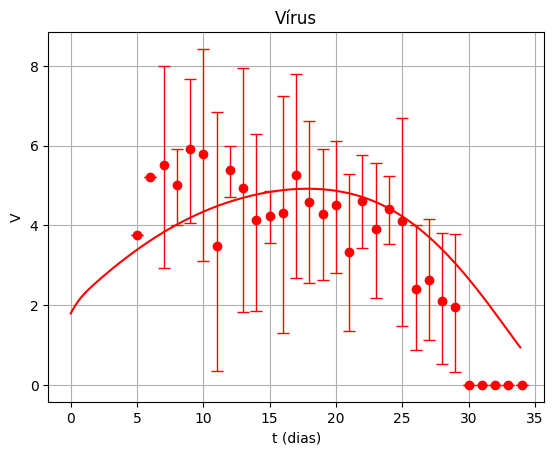

<ipython-input-1-c7efacd9224c>:143: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_il6 = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/dataset_il6_non_survivor.csv",',')


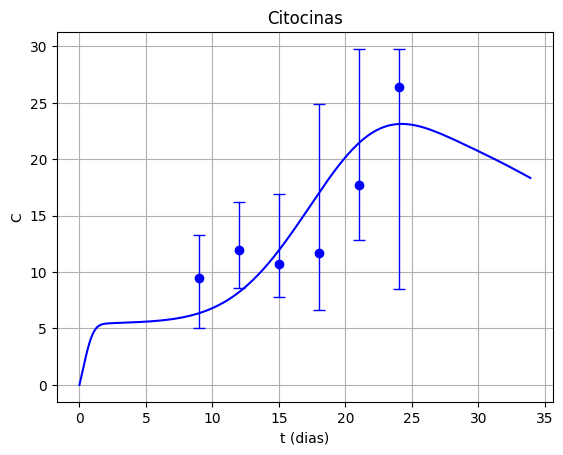

<ipython-input-1-c7efacd9224c>:165: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_IgG = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgG_data.csv",',')


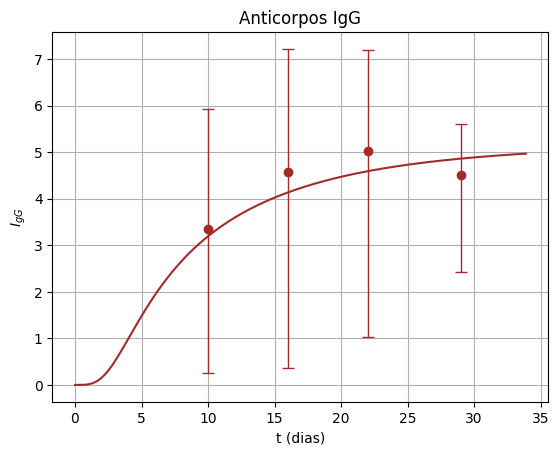

<ipython-input-1-c7efacd9224c>:186: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset_IgM = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgM_data.csv",',')


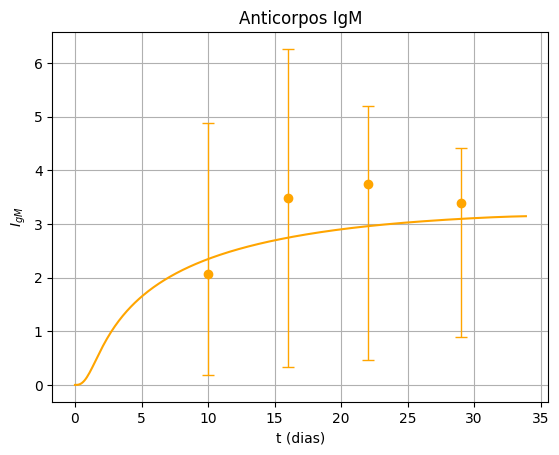

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from google.colab import files, drive

def modelo(t, y, pi_v, k_v1, k_v2, k_v3, alfa_ap, beta_ap, c_ap1, c_ap2, delta_apm, beta_apm, beta_tke, alfa_th, beta_th, pi_th, delta_th, alfa_tk, beta_tk, pi_tk, delta_tk, alfa_b, pi_b1, pi_b2, beta_ps, beta_pl, beta_bm, delta_ps, delta_pl, gamma_bm, pi_bm1, pi_bm2, pi_ps, pi_pl, delta_am, delta_ag, pi_c_apm, pi_c_i, pi_c_tke, delta_c, Ap0, Thn0, Tkn0, B0):
  V, Ap, Apm, I, Thn, The, Tkn, Tke, B, Ps, Pl, Bm, IgM, IgG, C = y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14]

  dVdt = pi_v * V - k_v1 * V * IgG - k_v1 * V * IgM - k_v2 * V * Tke - k_v3 * V * Apm # vírus

  dApdt = alfa_ap * (C + 1) * (Ap0 - Ap) - beta_ap * Ap * ((c_ap1 * V) / (c_ap2 + V))  # APCs imaturas

  dApmdt = beta_ap * Ap * ((c_ap1 * V) / (c_ap2 + V)) - beta_apm * Apm * V - delta_apm * Apm  # APCs maduras

  dIdt = beta_apm * Apm * V + beta_tke * Tke * V - delta_apm * I  # células infectadas

  dThndt = alfa_th * (Thn0 - Thn) - beta_th * Apm * Thn  # células T CD4+ imaturas

  dThedt = beta_th * Apm * Thn + pi_th * Apm * The - delta_th * The # células T CD4+ maduras

  dTkndt = alfa_tk * (C + 1) * (Tkn0 - Tkn) - beta_tk * (C + 1) * Apm * Tkn # células T CD8+ imaturas

  dTkedt = beta_tk * (C + 1) * Apm * Tkn + pi_tk * Apm * Tke - beta_tke * Tke * V - delta_tk * Tke # células T CD8+ maduras

  dBdt = alfa_b * (B0 - B) + pi_b1 * V * B + pi_b2 * The * B - beta_ps * Apm * B - beta_pl * The * B - beta_bm * The * B # células B

  dPsdt = beta_ps * Apm * B - delta_ps * Ps # plasmócitos de vida curta

  dPldt = beta_pl * The * B - delta_pl * Pl + gamma_bm * Bm # plasmócitos de vida longa

  dBmdt = beta_bm * The * B + pi_bm1 * Bm * (1 - (Bm / pi_bm2)) - gamma_bm * Bm # células B de memória

  dIgMdt = pi_ps * Ps - delta_am * IgM # anticorpos IgM

  dIgGdt = pi_pl * Pl - delta_ag * IgG # anticorpos IgG

  dCdt = pi_c_apm * Apm + pi_c_i * I + pi_c_tke * Tke - delta_c * C # citocinas
  
  return [ dVdt, dApdt, dApmdt, dIdt, dThndt, dThedt, dTkndt, dTkedt, dBdt, dPsdt, dPldt, dBmdt, dIgMdt, dIgGdt, dCdt ]


# intervalo de tempo
t0 = 0.0
tf = 34.0
t = np.arange(t0, tf, 0.1)
t_span = (t0, tf)

# condições iniciais
V0 = 61.0
Ap0 = 10**(6)
Apm0 = 0.0
I0 = 0.0
Thn0 = 10**(6)
The0 = 0.0
Tkn0 = 5.0 * 10**(5)
Tke0 = 0.0
B0 = 2.5 * 10**(5)
Ps0 = 0.0
Pl0 = 0.0
Bm0 = 0.0
IgM0 = 0.0
IgG0 = 0.0
C0 = 0.0

# valores dos parâmetros
#pi_v = 1.47 * 10**(0)
pi_v = 1.4742055035646986
k_v1 = 9.82 * 10**(-3)
k_v2 = 6.10 * 10**(-5)
k_v3 = 6.45 * 10**(-2)
alfa_ap = 1.0 * 10**(0)
beta_ap = 1.79 * 10**(-1)
c_ap1 = 8.0 * 10**(0)
c_ap2 = 8.08 * 10**(6)
delta_apm = 4.0 * 10**(-2)
beta_apm = 1.51 * 10**(-2)
beta_tke = 1.0 * 10**(-6)
alfa_th = 2.17 * 10**(-4)
beta_th = 1.8 * 10**(-5)
pi_th = 1.0 * 10**(-8)
delta_th = 3.0 * 10**(-1)
alfa_tk = 1.0 * 10**(0)
beta_tk = 1.43 * 10**(-5)
pi_tk = 1.0 * 10**(-8)
delta_tk = 3.0e-2
#alfa_b = 3.578236584
alfa_b = 3.578236584371140339e+02
pi_b1 = 8.98 * 10**(-5)
pi_b2 = 1.27 * 10**(-8)
beta_ps = 6.0 * 10**(-6)
beta_pl = 5.0 * 10**(-6)
beta_bm = 1.0 * 10**(-6)
delta_ps = 2.5 * 10**(0)
delta_pl = 3.5 * 10**(-1)
gamma_bm = 9.75 * 10**(-4)
pi_bm1 = 1.0 * 10**(-5)
pi_bm2 = 2.5 * 10**(3)
pi_ps = 8.7 * 10**(-2)
pi_pl = 1.0 * 10**(-3) 
delta_am = 7.0 * 10**(-2) 
delta_ag = 7.0 * 10**(-2)
pi_c_apm = 3.28 * 10**(2)
pi_c_i = 9.96 * 10**(-2)
pi_c_tke = 1.78 * 10**(-2)
delta_c = 7.04 * 10**(2)

y0 =  [V0, Ap0, Apm0, I0, Thn0, The0, Tkn0, Tke0, B0, Ps0, Pl0, Bm0, IgM0, IgG0, C0]
mmargs = (pi_v, k_v1, k_v2, k_v3, alfa_ap, beta_ap, c_ap1, c_ap2, delta_apm, beta_apm, beta_tke, alfa_th, beta_th, pi_th, delta_th, alfa_tk, beta_tk, pi_tk, delta_tk, alfa_b, pi_b1, pi_b2, beta_ps, beta_pl, beta_bm, delta_ps, delta_pl, gamma_bm, pi_bm1, pi_bm2, pi_ps, pi_pl, delta_am, delta_ag, pi_c_apm, pi_c_i, pi_c_tke, delta_c, Ap0, Thn0, Tkn0, B0)

sol = solve_ivp(modelo, t_span, y0, args=(mmargs), method='Radau', t_eval=t)

# gráficos

plt.plot(sol.t, np.log10(sol.y[0] + 1), color='red')
plt.title("Vírus")
plt.xlabel("t (dias)")
plt.ylabel("V")
plt.grid()

dataset_viremia = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/Viral_load.csv",',')

x = dataset_viremia[dataset_viremia.type == 'mean']['x'] + 5
y = np.log10(dataset_viremia[dataset_viremia.type == 'mean']['y'] + 1)

dataset_viremia_up = np.log10(dataset_viremia[dataset_viremia.type == 'up']['y'] + 1)
dataset_viremia_down = np.log10(dataset_viremia[dataset_viremia.type == 'down']['y'] + 1)
dataset_viremia_mean = np.log10(dataset_viremia[dataset_viremia.type == 'mean']['y'] + 1)

y_error = [dataset_viremia_mean.to_numpy() - dataset_viremia_down.to_numpy(), dataset_viremia_up.to_numpy() - dataset_viremia_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='red', capsize=4, elinewidth=1)

plt.show()


plt.plot(sol.t, sol.y[14], color='blue')
plt.title("Citocinas")
plt.xlabel("t (dias)")
plt.ylabel("C")
plt.grid()

dataset_il6 = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/dataset_il6_non_survivor.csv",',')

x = dataset_il6[dataset_il6.type == 'mean']['x']
y = dataset_il6[dataset_il6.type == 'mean']['y']

dataset_il6_up = dataset_il6[dataset_il6.type == 'up']['y']
dataset_il6_down = dataset_il6[dataset_il6.type == 'down']['y']
dataset_il6_mean = dataset_il6[dataset_il6.type == 'mean']['y']

y_error = [dataset_il6_mean.to_numpy() - dataset_il6_down.to_numpy(), dataset_il6_up.to_numpy() - dataset_il6_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='blue', capsize=4, elinewidth=1)

plt.show()


plt.plot(sol.t, np.log2(sol.y[13] + 1), color='brown')
plt.title("Anticorpos IgG")
plt.xlabel("t (dias)")
plt.ylabel("$I_{gG}$")
plt.grid()

dataset_IgG = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgG_data.csv",',')

x = dataset_IgG[dataset_IgG.type == 'mean']['x']
y = np.log2(dataset_IgG[dataset_IgG.type == 'mean']['y'] + 1)

dataset_IgG_up = np.log2(dataset_IgG[dataset_IgG.type == 'up']['y'] + 1)
dataset_IgG_down = np.log2(dataset_IgG[dataset_IgG.type == 'down']['y'] + 1)
dataset_IgG_mean = np.log2(dataset_IgG[dataset_IgG.type == 'mean']['y'] + 1)

y_error = [dataset_IgG_mean.to_numpy() - dataset_IgG_down.to_numpy(), dataset_IgG_up.to_numpy() - dataset_IgG_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='brown', capsize=4, elinewidth=1)

plt.show()

plt.plot(sol.t, np.log2(sol.y[12] + 1), color='orange')
plt.title("Anticorpos IgM")
plt.xlabel("t (dias)")
plt.ylabel("$I_{gM}$")
plt.grid()

dataset_IgM = pd.read_csv("https://raw.githubusercontent.com/ruyfreis/covid19_model/main/data/IgM_data.csv",',')

x = dataset_IgM[dataset_IgM.type == 'mean']['x']
y = np.log2(dataset_IgM[dataset_IgM.type == 'mean']['y'] + 1)

dataset_IgM_up = np.log2(dataset_IgM[dataset_IgM.type == 'up']['y'] + 1)
dataset_IgM_down = np.log2(dataset_IgM[dataset_IgM.type == 'down']['y'] + 1)
dataset_IgM_mean = np.log2(dataset_IgM[dataset_IgM.type == 'mean']['y'] + 1)

y_error = [dataset_IgM_mean.to_numpy() - dataset_IgM_down.to_numpy(), dataset_IgM_up.to_numpy() - dataset_IgM_mean.to_numpy()]

plt.errorbar(x,y, yerr = y_error, linestyle='None', label='Data', fmt='o', color='orange', capsize=4, elinewidth=1)

plt.show()

